# ✈️ Aviation Accident Analysis

**ECE 143 - Programming for Data Analysis**

This notebook demonstrates all visualizations and analysis of historical aviation accidents from 1921 to present.

---

## Table of Contents
1. Setup and Imports
2. Load and Explore Data
3. Data Preprocessing
4. Temporal Analysis
5. Geographic Analysis
6. Operator Analysis
7. Aircraft Analysis
8. Severity Analysis
9. Time-of-Day Analysis
10. Weather & Flight Phase Analysis
11. Interactive Maps
12. Summary Statistics


## 1. Setup and Imports


In [3]:

import os
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from IPython.display import display, HTML

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

%matplotlib inline

## 2. Load and Explore Data


In [4]:

DATA_PATH = "planecrashinfo_clean.csv"

df = pd.read_csv(DATA_PATH)
print(f"Dataset loaded: {df.shape[0]} records, {df.shape[1]} columns")
print(f"\nColumns: {list(df.columns)}")


Dataset loaded: 4961 records, 29 columns

Columns: ['aboard', 'aircraft_type', 'cn_ln', 'date', 'detail_url', 'fatalities', 'flight_no', 'ground_fatalities', 'location', 'operator', 'raw_text', 'registration', 'route', 'summary', 'time', 'year_page_url', 'date_parsed', 'time_raw', 'time_hhmm', 'fatalities_total', 'fatalities_passengers', 'fatalities_crew', 'location_city', 'location_state', 'location_country', 'aircraft_category', 'phase_clean', 'weather_condition', 'weather_adverse']


In [5]:
df.head()


,aboard,aircraft_type,cn_ln,date,detail_url,fatalities,flight_no,ground_fatalities,location,operator,...,fatalities_total,fatalities_passengers,fatalities_crew,location_city,location_state,location_country,aircraft_category,phase_clean,weather_condition,weather_adverse
0,1 (passengers:0 crew:1),De Havilland DH-4,?,"February 03, 1921",https://www.planecrashinfo.com/1921/1921-1.htm,1 (passengers:0 crew:1),?,0.0,"Mendotta, Minnisota",US Aerial Mail Service,...,1.0,0.0,1.0,Mendotta,Minnisota,NaN,Other/Unmapped,Takeoff,None/Not mentioned,False
1,49 (passengers:0 crew:49),Royal Airship Works ZR-2 (airship),R-38,"August 24, 1921",https://www.planecrashinfo.com/1921/1921-10.htm,43 (passengers:0 crew:43),?,1.0,"River Humber, England",Military - Royal Airship Works,...,43.0,0.0,43.0,River Humber,NaN,England,Other/Unmapped,Unknown,None/Not mentioned,False
2,5 (passengers:4 crew:1),Potez IX,160,"September 06, 1921",https://www.planecrashinfo.com/1921/1921-11.htm,5 (passengers:4 crew:1),?,0.0,"Paris, France",Franco-Roumaine,...,5.0,4.0,1.0,Paris,NaN,France,Other/Unmapped,Approach,None/Not mentioned,False
3,2 (passengers:0 crew:2),Bristol 28 Tourer,6116,"December 05, 1921",https://www.planecrashinfo.com/1921/1921-12.htm,2 (passengers:0 crew:2),?,0.0,"Near Murchinson River, Australia",West Australian Airways,...,2.0,0.0,2.0,Near Murchinson River,NaN,Australia,Other/Unmapped,Approach,None/Not mentioned,False
4,3 (passengers:0 crew:3),Junkers F-13,?,"February 09, 1921",https://www.planecrashinfo.com/1921/1921-2.htm,3 (passengers:0 crew:3),?,0.0,"La Crosse, Wisconsin",US Aerial Mail Service,...,3.0,0.0,3.0,La Crosse,Wisconsin,United States,Military,Unknown,None/Not mentioned,False


In [6]:
df.describe()


,ground_fatalities,fatalities_total,fatalities_passengers,fatalities_crew
count,4907.000000,4943.000000,4737.000000,4737.000000
mean,1.796413,22.115112,18.764197,3.580114
std,55.855496,34.020911,33.019022,3.165209
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,1.000000,2.000000
50%,0.000000,11.000000,8.000000,3.000000
75%,0.000000,25.000000,21.000000,5.000000
max,2750.000000,583.000000,560.000000,43.000000


## 3. Data Preprocessing


In [7]:
from visualization import preprocess

df = preprocess(df)

print("Preprocessing complete!")
print(f"New columns added: year, decade, fatality_ratio, hour")
print(f"Total records: {len(df)}")

print("\nAccidents by decade:")
print(df['decade'].value_counts().sort_index())


Preprocessing complete!
New columns added: year, decade, fatality_ratio, hour
Total records: 4961

Accidents by decade:
decade
1920.0    164
1930.0    361
1940.0    581
1950.0    652
1960.0    658
1970.0    612
1980.0    496
1990.0    631
2000.0    506
2010.0    237
2020.0     53
Name: count, dtype: int64


---

# Visualizations

---

## 4. Temporal Analysis

### 4.1 Yearly Crashes and Fatalities


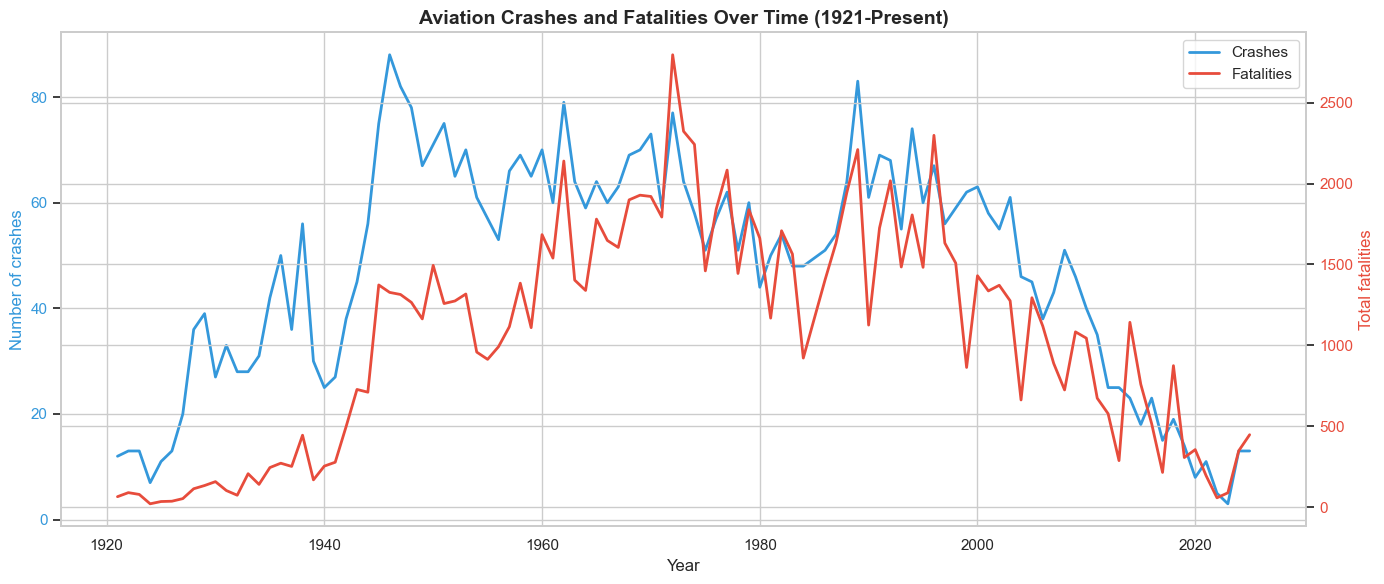

In [8]:
yearly = (
    df.groupby("year", dropna=True)
    .agg(crashes=("year", "count"), fatalities=("fatalities_total", "sum"))
    .reset_index()
)

fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.plot(yearly["year"], yearly["crashes"], label="Crashes", color="#3498db", linewidth=2)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Number of crashes", color="#3498db", fontsize=12)
ax1.tick_params(axis="y", labelcolor="#3498db")

ax2 = ax1.twinx()
ax2.plot(yearly["year"], yearly["fatalities"], color="#e74c3c", label="Fatalities", linewidth=2)
ax2.set_ylabel("Total fatalities", color="#e74c3c", fontsize=12)
ax2.tick_params(axis="y", labelcolor="#e74c3c")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right")

plt.title("Aviation Crashes and Fatalities Over Time (1921-Present)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


### 4.2 Cumulative Fatalities Over Time


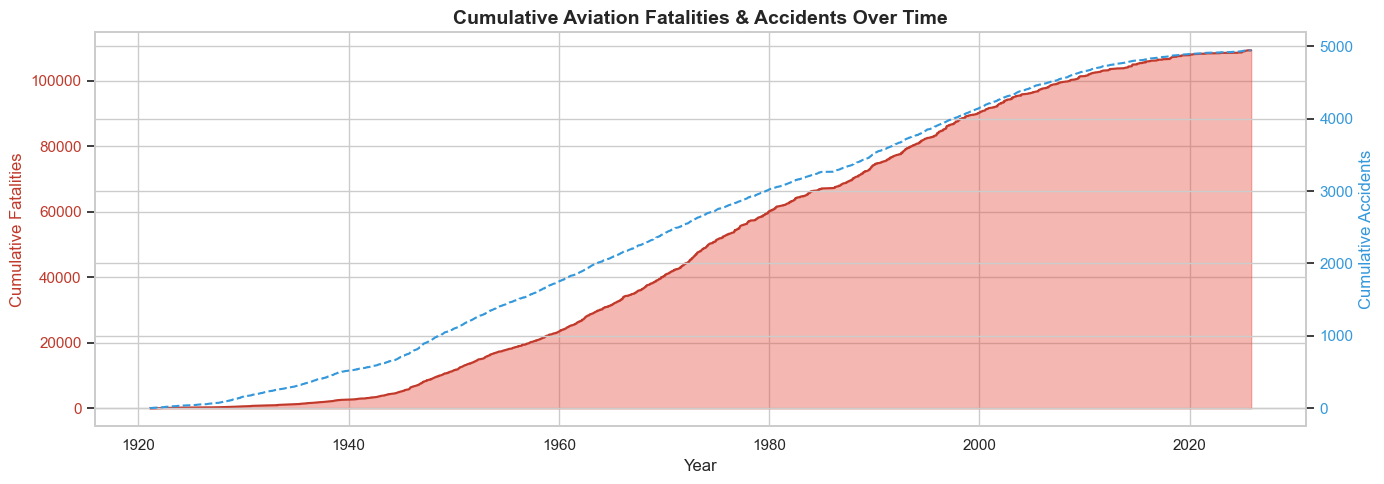

Total cumulative fatalities: 109,315
Total accidents: 4,943


In [9]:
df_copy = df.copy()
df_copy["date_parsed"] = pd.to_datetime(df_copy["date_parsed"], errors="coerce")
subset = df_copy.dropna(subset=["date_parsed", "fatalities_total"]).sort_values("date_parsed")
subset["cumulative_fatalities"] = subset["fatalities_total"].cumsum()
subset["cumulative_accidents"] = range(1, len(subset) + 1)

fig, ax1 = plt.subplots(figsize=(14, 5))

ax1.fill_between(subset["date_parsed"], subset["cumulative_fatalities"], alpha=0.4, color="#e74c3c")
ax1.plot(subset["date_parsed"], subset["cumulative_fatalities"], color="#c0392b", linewidth=1.5)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Cumulative Fatalities", color="#c0392b", fontsize=12)
ax1.tick_params(axis="y", labelcolor="#c0392b")

ax2 = ax1.twinx()
ax2.plot(subset["date_parsed"], subset["cumulative_accidents"], color="#3498db", linewidth=1.5, linestyle="--")
ax2.set_ylabel("Cumulative Accidents", color="#3498db", fontsize=12)
ax2.tick_params(axis="y", labelcolor="#3498db")

plt.title("Cumulative Aviation Fatalities & Accidents Over Time", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"Total cumulative fatalities: {int(subset['cumulative_fatalities'].max()):,}")
print(f"Total accidents: {int(subset['cumulative_accidents'].max()):,}")


### 4.3 Top Deadliest Years


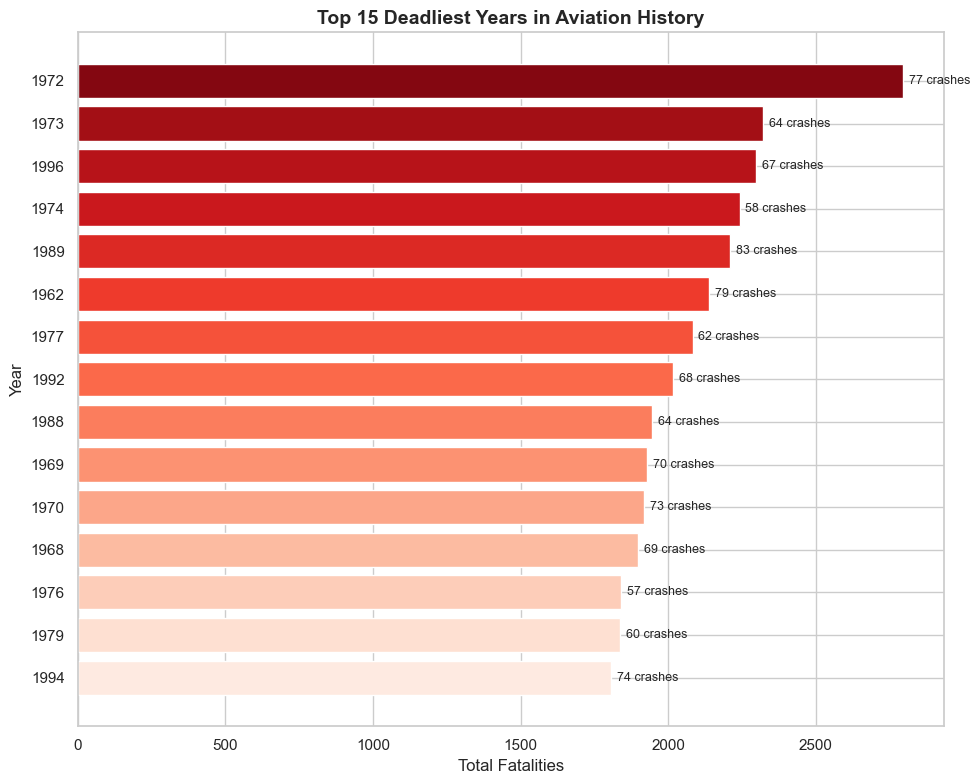

In [10]:
agg = (
    df.dropna(subset=["year", "fatalities_total"])
    .groupby("year")
    .agg(total_fatalities=("fatalities_total", "sum"), num_accidents=("fatalities_total", "count"))
    .reset_index()
    .nlargest(15, "total_fatalities")
    .sort_values("total_fatalities", ascending=True)
)

fig, ax = plt.subplots(figsize=(10, 8))
colors = sns.color_palette("Reds", len(agg))
bars = ax.barh(agg["year"].astype(int).astype(str), agg["total_fatalities"], color=colors)

for bar, (_, row) in zip(bars, agg.iterrows()):
    ax.text(row["total_fatalities"] + 20, bar.get_y() + bar.get_height()/2,
            f"{int(row['num_accidents'])} crashes", va="center", fontsize=9)

ax.set_xlabel("Total Fatalities", fontsize=12)
ax.set_ylabel("Year", fontsize=12)
ax.set_title("Top 15 Deadliest Years in Aviation History", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


### 4.4 Survival Rate by Decade


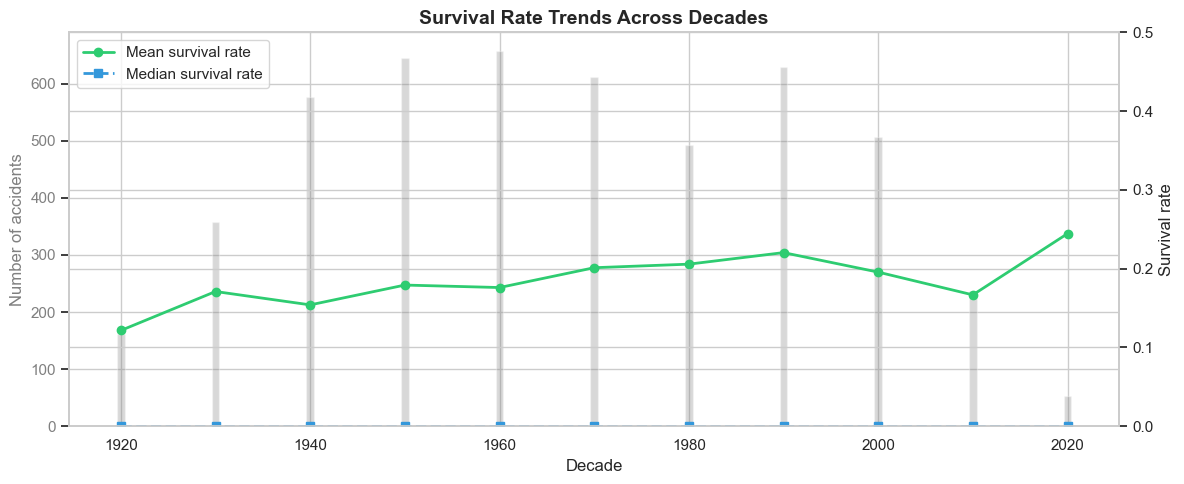

In [11]:
subset = df[
    df["fatality_ratio"].notna()
    & (df["fatality_ratio"] >= 0)
    & (df["fatality_ratio"] <= 1)
    & df["decade"].notna()
].copy()

subset["survival_rate"] = 1 - subset["fatality_ratio"]

agg = (
    subset.groupby("decade")
    .agg(
        mean_survival=("survival_rate", "mean"),
        median_survival=("survival_rate", "median"),
        total_accidents=("survival_rate", "count"),
    )
    .reset_index()
)

fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.bar(agg["decade"], agg["total_accidents"], alpha=0.3, color="gray", label="Total accidents")
ax1.set_xlabel("Decade", fontsize=12)
ax1.set_ylabel("Number of accidents", color="gray", fontsize=12)
ax1.tick_params(axis="y", labelcolor="gray")

ax2 = ax1.twinx()
ax2.plot(agg["decade"], agg["mean_survival"], marker="o", color="#2ecc71", linewidth=2, label="Mean survival rate")
ax2.plot(agg["decade"], agg["median_survival"], marker="s", color="#3498db", linewidth=2, linestyle="--", label="Median survival rate")
ax2.set_ylabel("Survival rate", fontsize=12)
ax2.set_ylim(0, 0.5)
ax2.legend(loc="upper left")

plt.title("Survival Rate Trends Across Decades", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


---

## 5. Geographic Analysis

### 5.1 Top Countries by Accidents


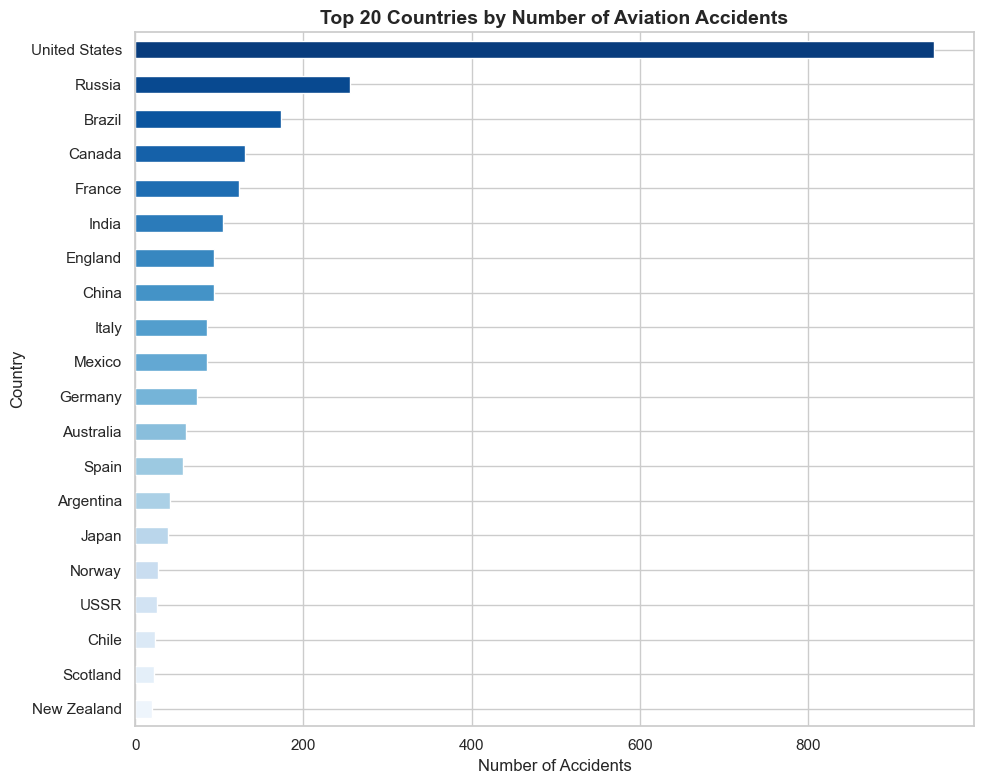

In [12]:
counts = df["location_country"].dropna().value_counts().head(20).sort_values()

plt.figure(figsize=(10, 8))
colors = sns.color_palette("Blues", len(counts))
counts.plot(kind="barh", color=colors)
plt.xlabel("Number of Accidents", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.title("Top 20 Countries by Number of Aviation Accidents", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


### 5.2 Interactive World Map (Accidents by Country)


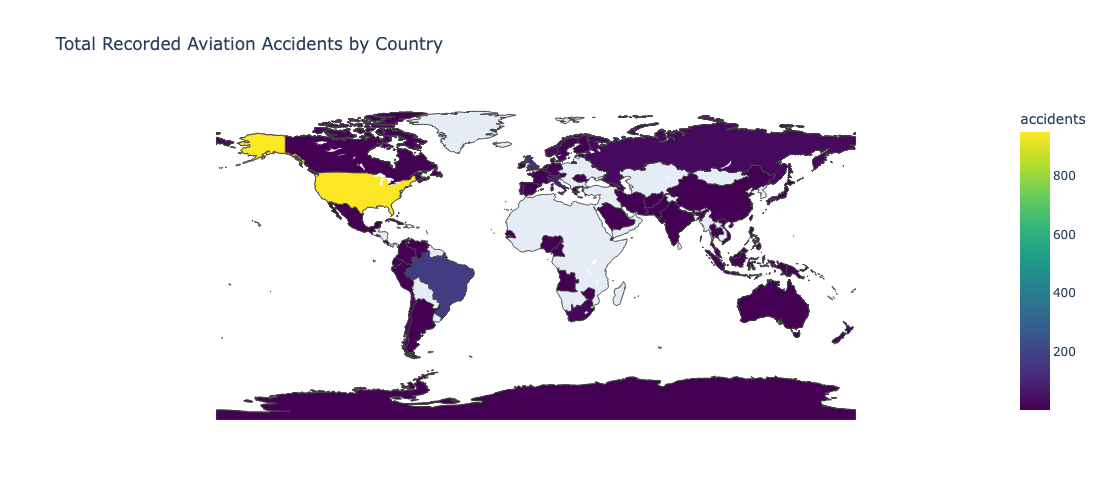

In [14]:
COUNTRY_FIX = {
    "USA": "United States", "U.S.A.": "United States", "U.S.": "United States",
    "United States of America": "United States", "US": "United States",
    "England": "United Kingdom", "Scotland": "United Kingdom",
    "Wales": "United Kingdom", "Northern Ireland": "United Kingdom", "UK": "United Kingdom",
    "Russia": "Russian Federation", "Soviet Union": "Russia",
}

map_df = df.copy()
map_df["location_country"] = map_df["location_country"].replace(COUNTRY_FIX)
agg = map_df.dropna(subset=["location_country"]).groupby("location_country").size().reset_index(name="accidents")

fig = px.choropleth(
    agg,
    locations="location_country",
    locationmode="country names",
    color="accidents",
    color_continuous_scale="Viridis",
    title="Total Recorded Aviation Accidents by Country",
)
fig.update_layout(geo=dict(showframe=False, showcoastlines=True), height=500)
fig.show()


---

## 6. Operator Analysis

### 6.1 Top Operators by Accidents


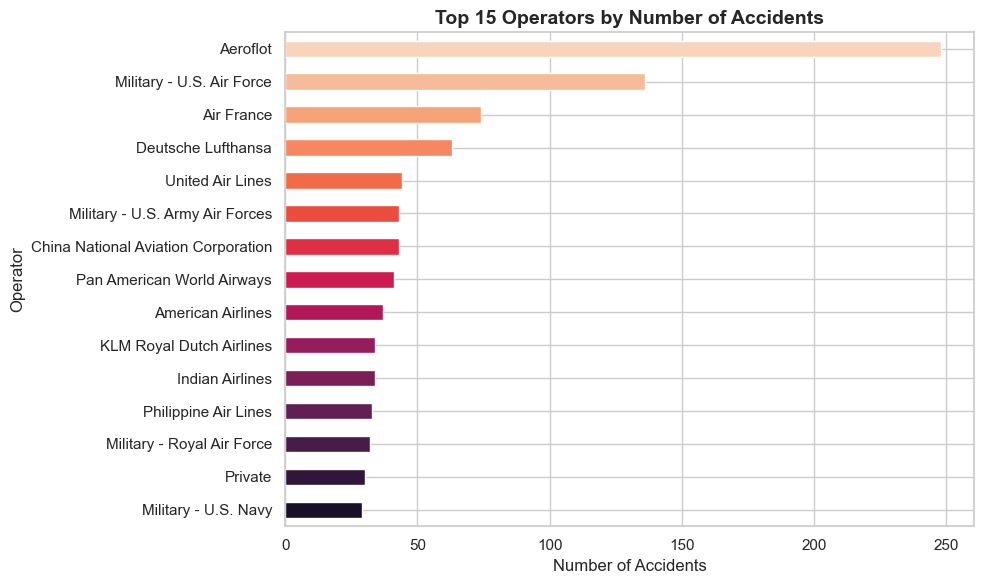

In [15]:
counts = df["operator"].dropna().value_counts().head(15).sort_values()

plt.figure(figsize=(10, 6))
counts.plot(kind="barh", color=sns.color_palette("rocket", len(counts)))
plt.xlabel("Number of Accidents", fontsize=12)
plt.ylabel("Operator", fontsize=12)
plt.title("Top 15 Operators by Number of Accidents", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


---

## 7. Aircraft Analysis

### 7.1 Aircraft Category Trends by Decade


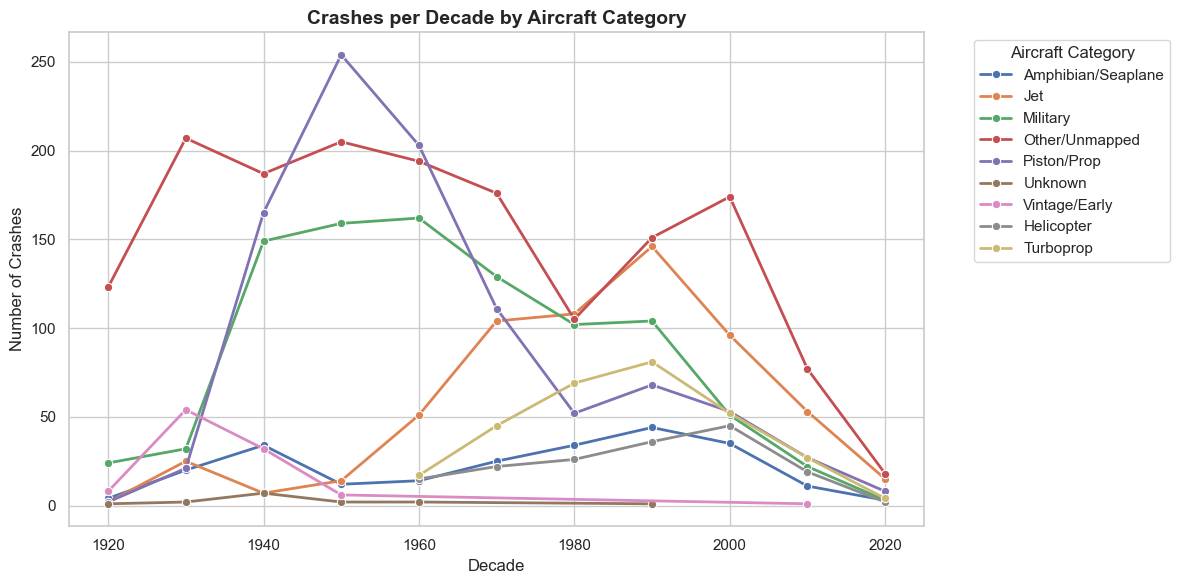

In [16]:
if "aircraft_category" in df.columns:
    sub = df.dropna(subset=["aircraft_category", "decade"])
    agg = sub.groupby(["decade", "aircraft_category"]).size().reset_index(name="crashes")

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=agg, x="decade", y="crashes", hue="aircraft_category", marker="o", linewidth=2)
    plt.xlabel("Decade", fontsize=12)
    plt.ylabel("Number of Crashes", fontsize=12)
    plt.title("Crashes per Decade by Aircraft Category", fontsize=14, fontweight='bold')
    plt.legend(title="Aircraft Category", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("Aircraft category data not available. Run data_cleaning.py first.")


### 7.2 Decade-Category Heatmap


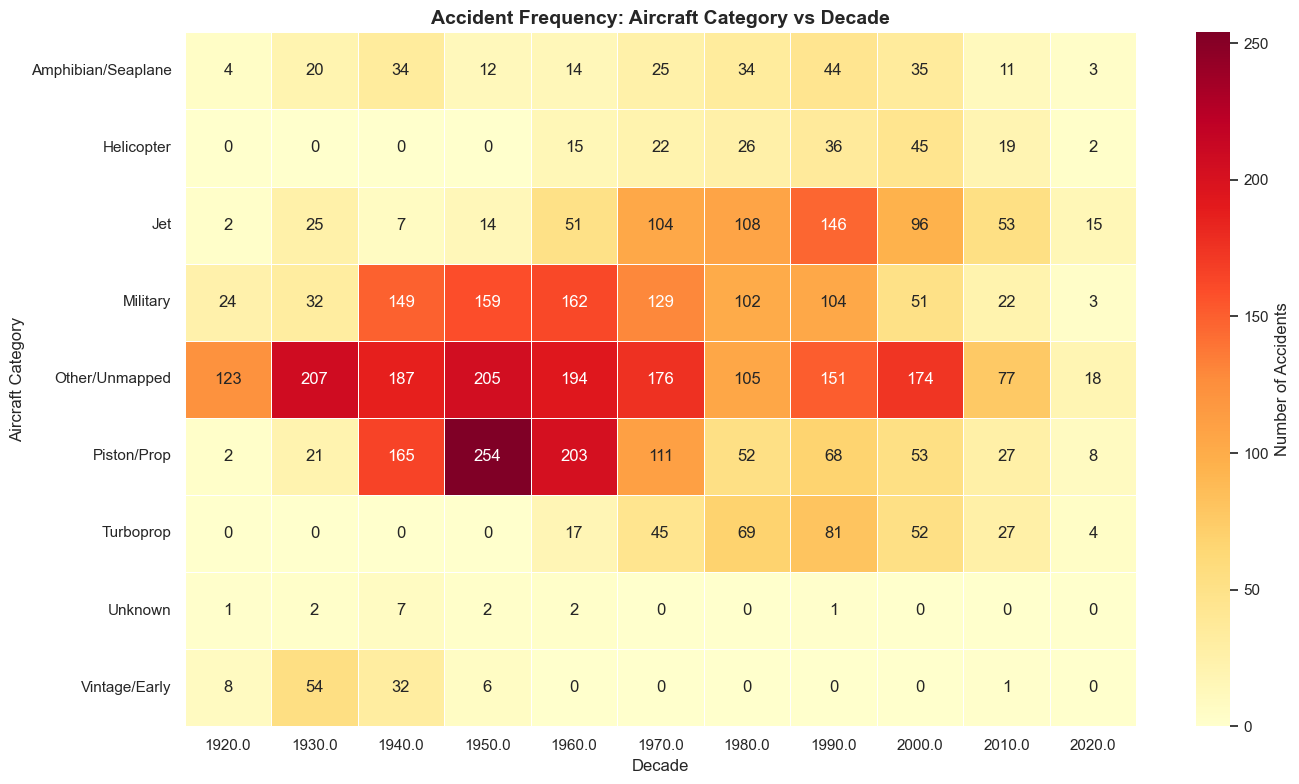

In [17]:
if "aircraft_category" in df.columns:
    subset = df.dropna(subset=["decade", "aircraft_category"])
    pivot = subset.pivot_table(index="aircraft_category", columns="decade", aggfunc="size", fill_value=0)

    plt.figure(figsize=(14, 8))
    sns.heatmap(pivot, annot=True, fmt="d", cmap="YlOrRd", linewidths=0.5, cbar_kws={"label": "Number of Accidents"})
    plt.xlabel("Decade", fontsize=12)
    plt.ylabel("Aircraft Category", fontsize=12)
    plt.title("Accident Frequency: Aircraft Category vs Decade", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("Aircraft category data not available.")


---

## 8. Severity Analysis

### 8.1 Aboard vs Fatalities (Scatter)


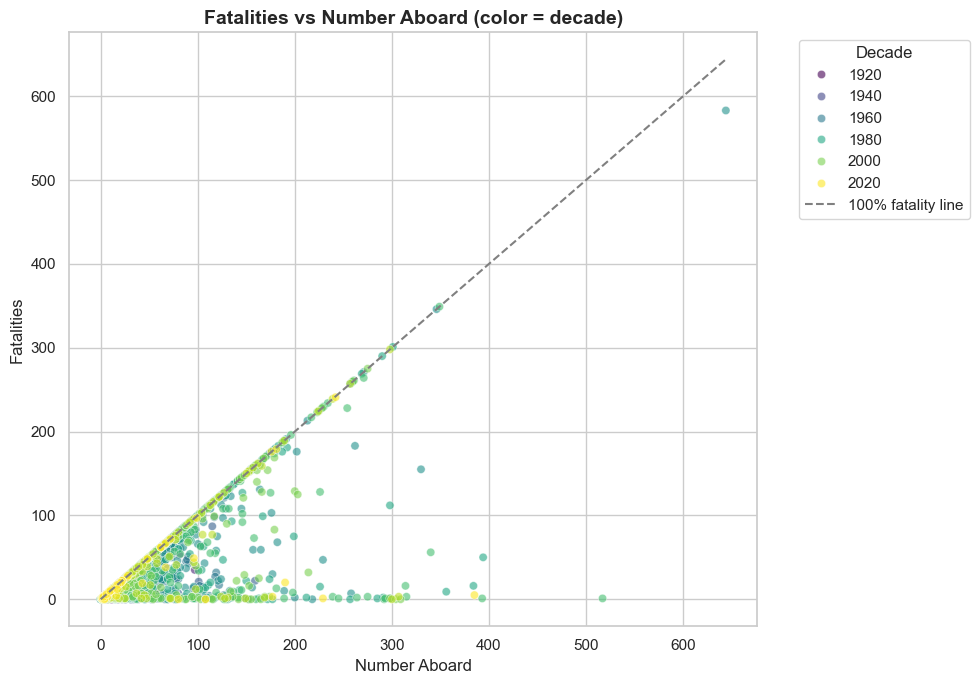

In [18]:
subset = df.dropna(subset=["aboard_total", "fatalities_total"])

plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(
    data=subset, x="aboard_total", y="fatalities_total", hue="decade", alpha=0.6, palette="viridis"
)
max_aboard = subset["aboard_total"].max()
plt.plot([0, max_aboard], [0, max_aboard], linestyle="--", color="gray", label="100% fatality line")
plt.xlabel("Number Aboard", fontsize=12)
plt.ylabel("Fatalities", fontsize=12)
plt.title("Fatalities vs Number Aboard (color = decade)", fontsize=14, fontweight='bold')
plt.legend(title="Decade", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 8.2 Fatality Ratio Density by Decade


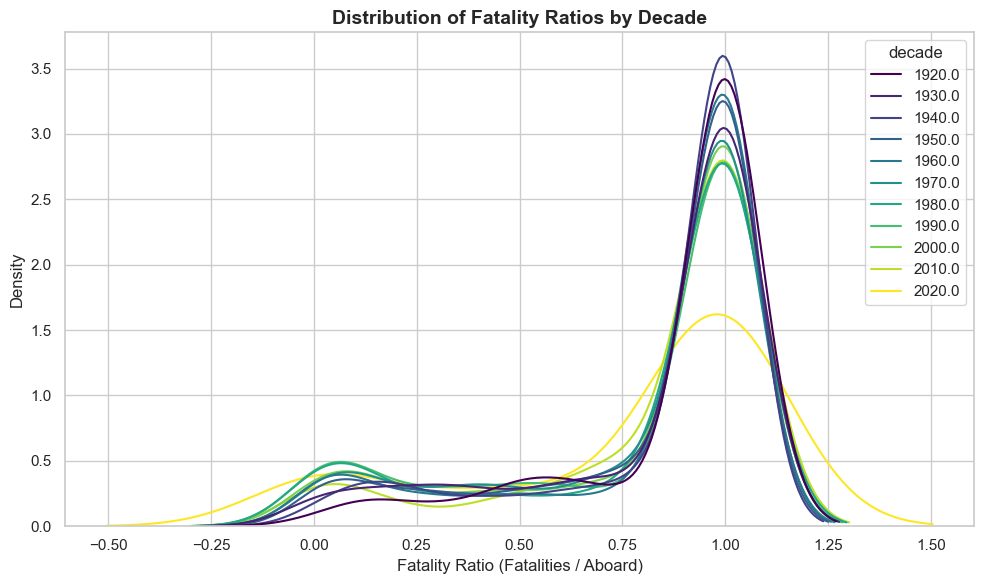

In [19]:
subset = df[
    (df["fatality_ratio"].notna())
    & (df["fatality_ratio"] >= 0)
    & (df["fatality_ratio"] <= 1)
    & df["decade"].notna()
].copy()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=subset, x="fatality_ratio", hue="decade", common_norm=False, palette="viridis")
plt.xlabel("Fatality Ratio (Fatalities / Aboard)", fontsize=12)
plt.title("Distribution of Fatality Ratios by Decade", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


### 8.3 Fatalities by Group and Decade (Passengers, Crew, Ground)


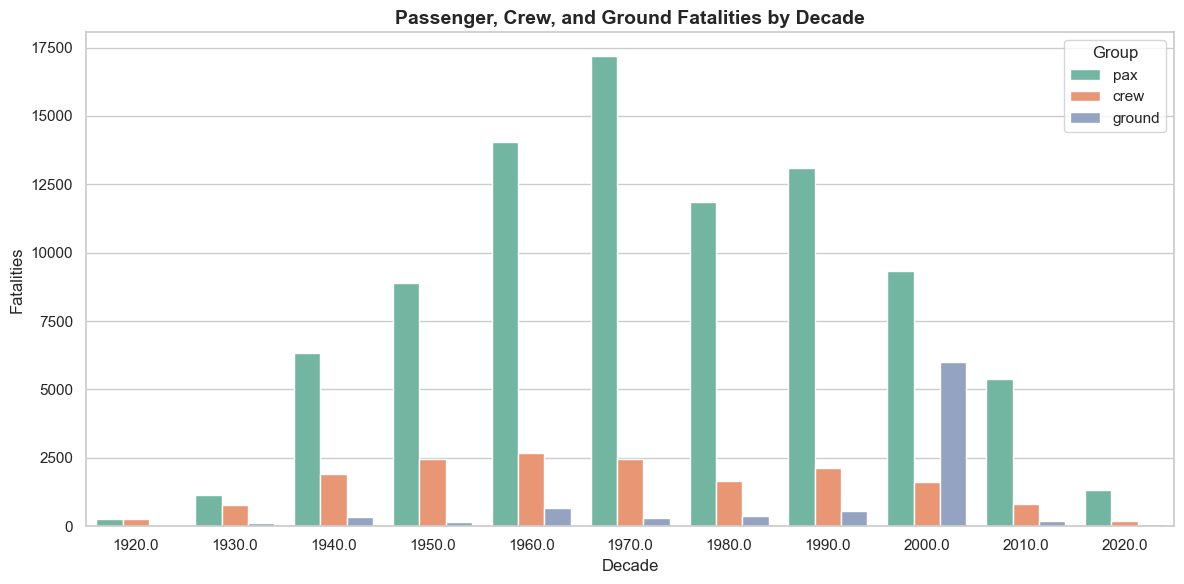

In [20]:
agg = (
    df.groupby("decade", dropna=True)
    .agg(pax=("fatalities_passengers", "sum"), crew=("fatalities_crew", "sum"), ground=("ground_fatalities", "sum"))
    .reset_index()
)

melted = agg.melt(id_vars="decade", value_vars=["pax", "crew", "ground"], var_name="group", value_name="fatalities")

plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x="decade", y="fatalities", hue="group", palette="Set2")
plt.title("Passenger, Crew, and Ground Fatalities by Decade", fontsize=14, fontweight='bold')
plt.xlabel("Decade", fontsize=12)
plt.ylabel("Fatalities", fontsize=12)
plt.legend(title="Group")
plt.tight_layout()
plt.show()


---

## 9. Time-of-Day Analysis

### 9.1 Accidents by Hour of Day


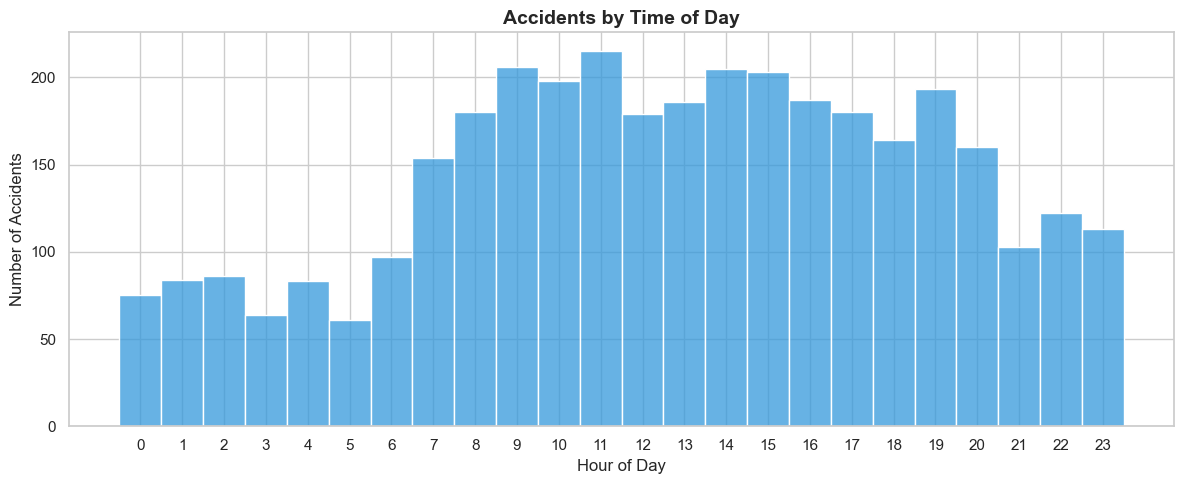

In [21]:
subset = df["hour"].dropna()

plt.figure(figsize=(12, 5))
sns.histplot(subset, bins=24, discrete=True, color="#3498db")
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.title("Accidents by Time of Day", fontsize=14, fontweight='bold')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


### 9.2 Hourly Severity Analysis


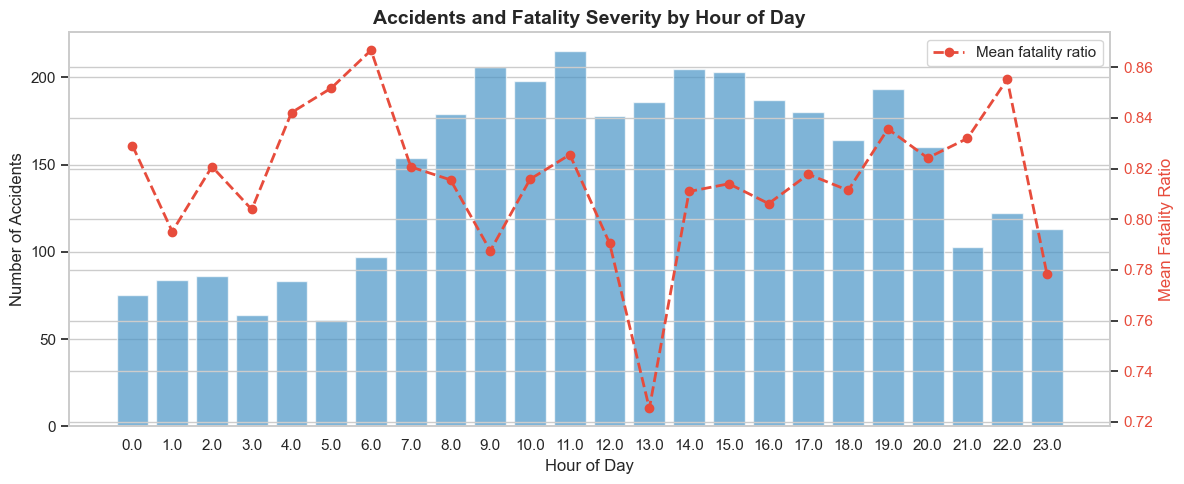

In [22]:
subset = df[
    df["hour"].notna()
    & df["fatality_ratio"].notna()
    & (df["fatality_ratio"] >= 0)
    & (df["fatality_ratio"] <= 1)
].copy()

agg = (
    subset.groupby("hour")
    .agg(crashes=("hour", "size"), mean_fatality_ratio=("fatality_ratio", "mean"))
    .reset_index()
    .sort_values("hour")
)

fig, ax1 = plt.subplots(figsize=(12, 5))
sns.barplot(data=agg, x="hour", y="crashes", ax=ax1, color="#3498db", alpha=0.7)
ax1.set_xlabel("Hour of Day", fontsize=12)
ax1.set_ylabel("Number of Accidents", fontsize=12)

ax2 = ax1.twinx()
ax2.plot(agg["hour"], agg["mean_fatality_ratio"], marker="o", linestyle="--", color="#e74c3c", linewidth=2, label="Mean fatality ratio")
ax2.set_ylabel("Mean Fatality Ratio", color="#e74c3c", fontsize=12)
ax2.tick_params(axis="y", labelcolor="#e74c3c")
ax2.legend(loc="upper right")

plt.title("Accidents and Fatality Severity by Hour of Day", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


---

## 10. Weather & Flight Phase Analysis

### 10.1 Weather Condition Counts


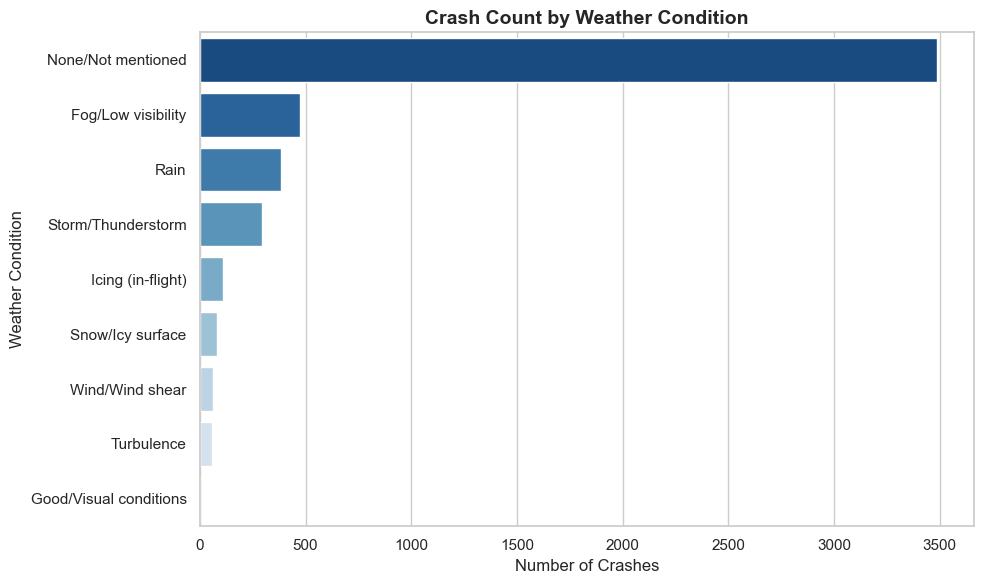

In [23]:
if "weather_condition" in df.columns:
    sub = df["weather_condition"].dropna()
    
    plt.figure(figsize=(10, 6))
    sns.countplot(y="weather_condition", data=df, order=sub.value_counts().index, palette="Blues_r")
    plt.xlabel("Number of Crashes", fontsize=12)
    plt.ylabel("Weather Condition", fontsize=12)
    plt.title("Crash Count by Weather Condition", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("Weather condition data not available. Run data_cleaning.py first.")


### 10.2 Flight Phase Analysis


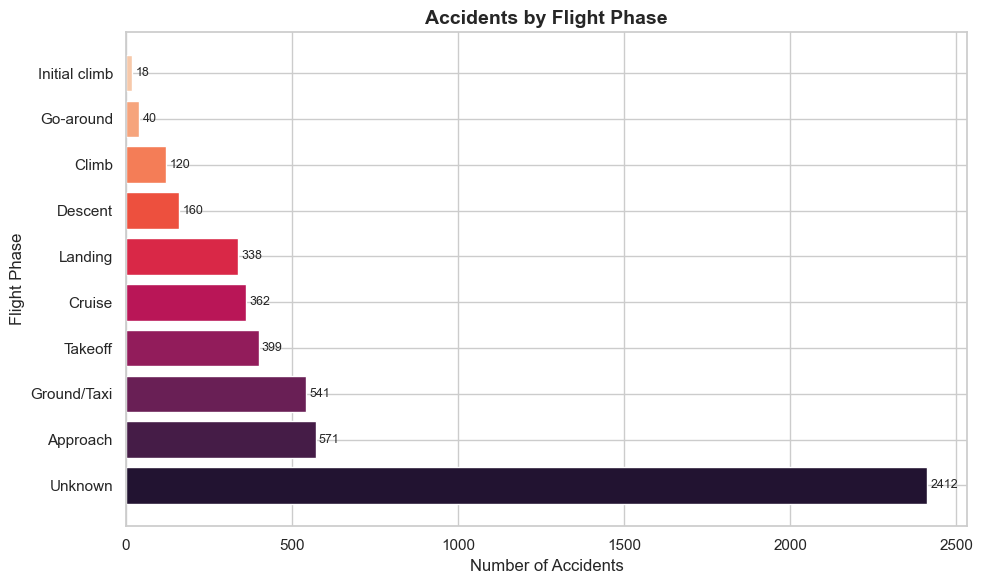

In [24]:
if "phase_clean" in df.columns:
    phase_counts = df["phase_clean"].dropna().value_counts()
    colors = sns.color_palette("rocket", len(phase_counts))

    plt.figure(figsize=(10, 6))
    bars = plt.barh(phase_counts.index, phase_counts.values, color=colors)
    plt.xlabel("Number of Accidents", fontsize=12)
    plt.ylabel("Flight Phase", fontsize=12)
    plt.title("Accidents by Flight Phase", fontsize=14, fontweight='bold')

    for bar, val in zip(bars, phase_counts.values):
        plt.text(val + 10, bar.get_y() + bar.get_height()/2, str(val), va="center", fontsize=9)

    plt.tight_layout()
    plt.show()
else:
    print("Flight phase data not available. Run data_cleaning.py first.")


---

## 11. Interactive Maps

### 11.1 Animated Map: Accidents by Country per Decade


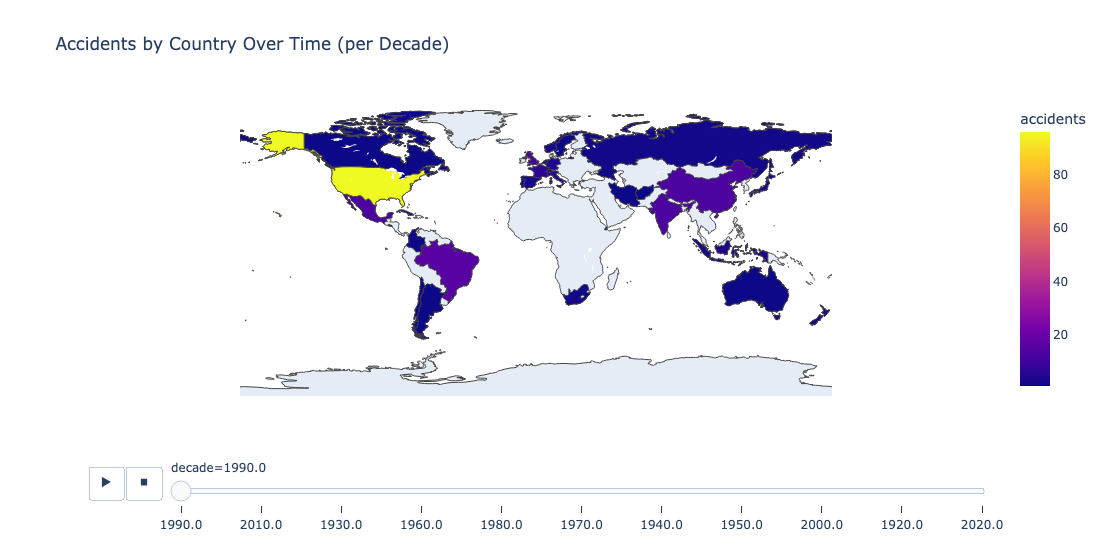

In [25]:
map_df = df.copy()
map_df["location_country"] = map_df["location_country"].replace(COUNTRY_FIX)
subset = map_df.dropna(subset=["location_country", "decade"])
agg = subset.groupby(["location_country", "decade"]).size().reset_index(name="accidents")

fig = px.choropleth(
    agg,
    locations="location_country",
    locationmode="country names",
    color="accidents",
    hover_name="location_country",
    animation_frame="decade",
    color_continuous_scale="Plasma",
    title="Accidents by Country Over Time (per Decade)",
)
fig.update_layout(geo=dict(showframe=False, showcoastlines=True), height=550)
fig.show()
